# DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Import data file

In [4]:
df = pd.read_csv("C:\DataAnalystProjects\Portfolio Project\ECommerceBlinkit\Data\BlinkIT Grocery Data.csv")
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


### Metadata of data

In [6]:
print("No of rows: " , df.shape[0])

No of rows:  8523


In [7]:
print("No of colums: " , df.shape[1])

No of colums:  12


### Datatypes 

In [12]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

### Data Cleaning

In [14]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [16]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF': 'Low Fat', 
                                                       'low fat': 'Low Fat',
                                                       'reg':'Regular'})

In [17]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### BUSINESS REQURIMENT

### KPI's Requirement

In [19]:
# Total Sales
total_sales= df['Total Sales'].sum()

#Average Sales
avg_sales = df['Total Sales'].mean()

#No of Items Sold
no_of_item_sold = df['Total Sales'].count()

#Average Rating
avg_rating = df['Rating'].mean()

#Disply All KPI's

print(f"Total Sales : ${total_sales:,.0f}") # .0f shows the how many decimal value show
print(f"Average Salee : ${avg_sales:,.1f}")
print(f"Number of Item Sold : {no_of_item_sold:,.0f}")
print(f"Average Rating : {avg_rating:,.1f}")

Total Sales : $1,201,681
Average Salee : $141.0
Number of Item Sold : 8,523
Average Rating : 4.0


### CHARTS REQURIMENTS

#### Total Sales by Fat Content

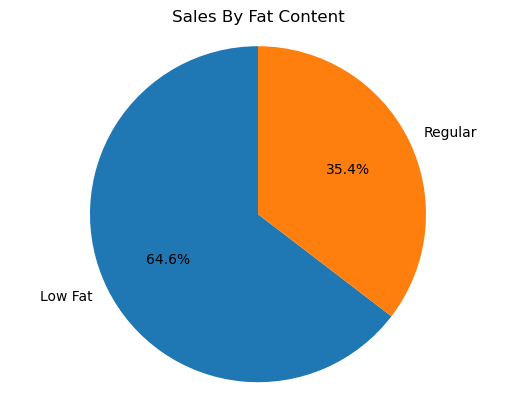

In [33]:
sales_by_fat = df.groupby('Item Fat Content')['Total Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,  
                        autopct ='%.1f%%', 
                        startangle = 90)
plt.title('Sales By Fat Content')
plt.axis('equal')
plt.show()

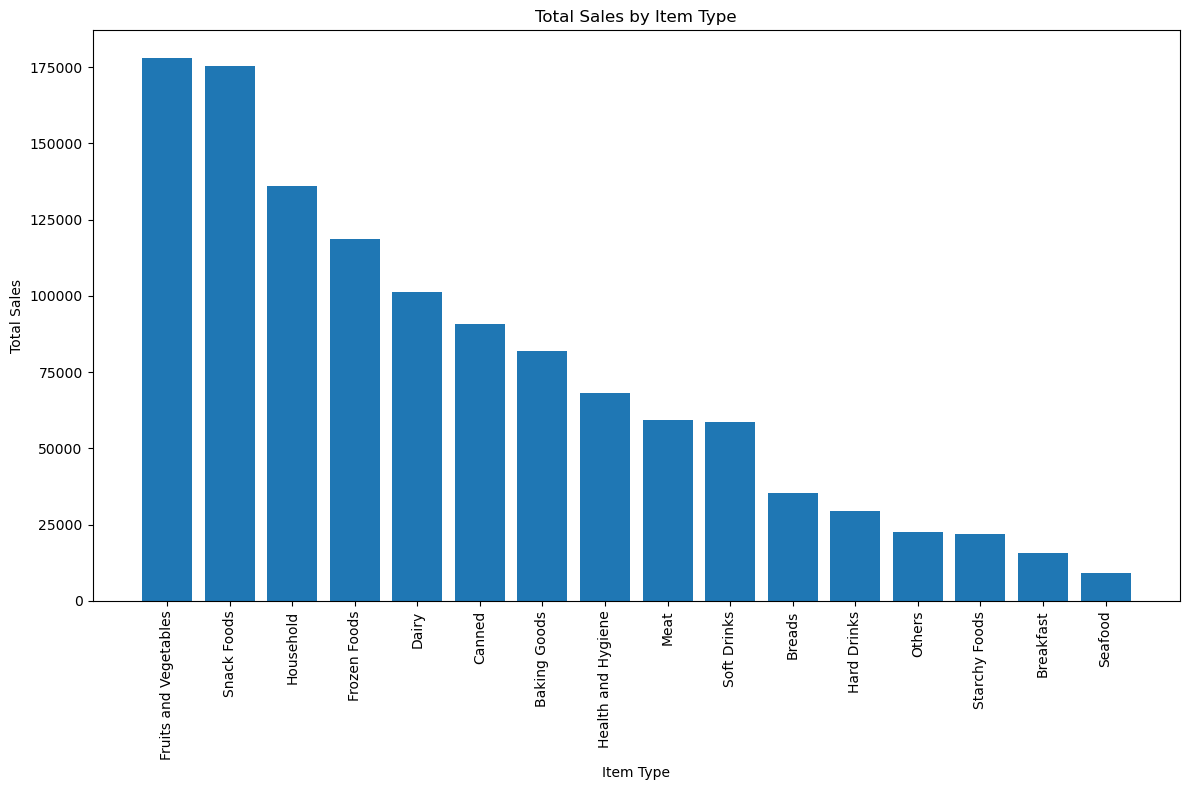

In [43]:
sales_by_type = df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')  # Removed the extra period here
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')


plt.tight_layout()
plt.show()


#### Fat Content by Outlet for Total Sales

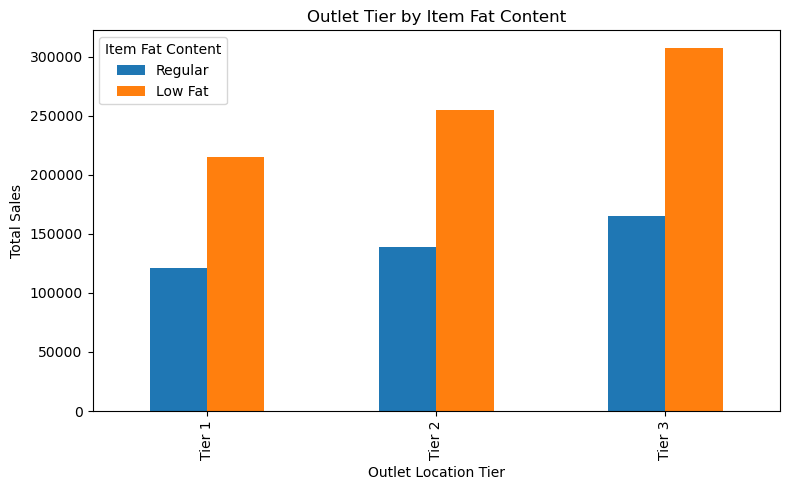

In [46]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content']) ['Total Sales'].sum().unstack()
grouped = grouped [['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### Total Sales By Outlet Establishment

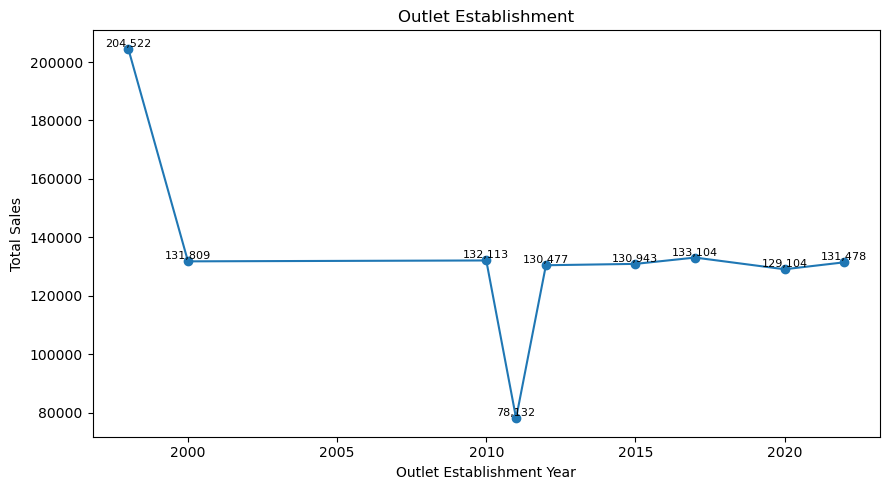

In [65]:
sales_by_year = df.groupby ('Outlet Establishment Year') ['Total Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

#### Sales By Outlet Size

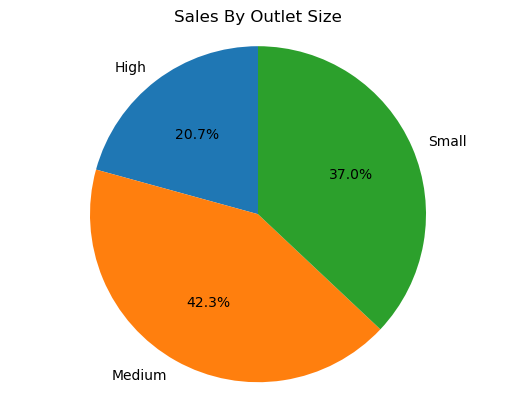

In [66]:
sales_by_fat = df.groupby('Outlet Size')['Total Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,  
                        autopct ='%.1f%%', 
                        startangle = 90)
plt.title('Sales By Outlet Size')
plt.axis('equal')
plt.show()

#### Sales By Outlet Location

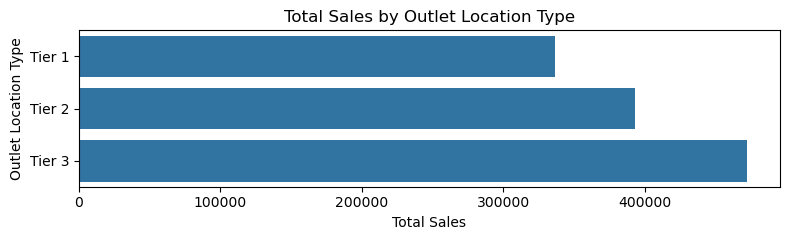

In [76]:
sales_by_location = df.groupby('Outlet Location Type')['Total Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Total Sales')

plt.figure(figsize=(8, 2.5))
ax = sb.barplot(x='Total Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout() 
plt.show()